In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [77]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

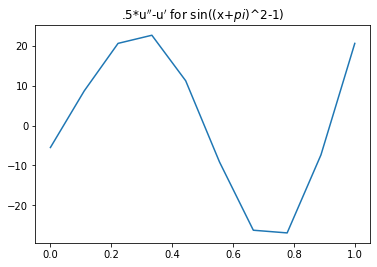

In [78]:
domain = np.linspace(0,1,10)
h = .1
#function we will use
f = lambda x: np.sin((x+np.pi)**2-1)
#using finite difference type method, approximate the equation
result = .5*(f(domain+h)-2*f(domain)+f(domain-h))/(h**2)-((f(domain+h/2)-f(domain-h/2))/h)

plt.plot(domain,result)
plt.title(".5*u$''$-u$'$ for sin((x+$pi$)^2-1)")
plt.show()

# Problem 2

Use equation (1.9) to solve the singularly perturbed BVP (1.7) with $\epsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\epsilon$. For $\epsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

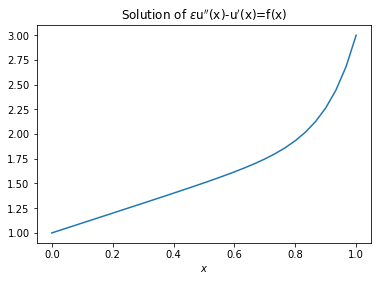

In [79]:
#create the initial values
n = 30
a = 0
b = 1
al = 1
beta = 3
ep = .1
h = 1/30
#make the domain over which we will solve this
domain = np.linspace(0,1,n+1)
#create a matrix that will be used to solve the system
d1 = np.diag([-2*ep]*(n-1),0)
d2 = np.diag([ep-h/2]*(n-2),1)
d3 = np.diag([ep+h/2]*(n-2),-1)
d = (d1+d2+d3)/(h**2)
f = np.array([-1]*(n-1))
f[0] = -1-al*(ep+h/2)/(h**2)
f[-1] = -1-beta*(ep-h/2)/(h**2)
result = la.solve(d,f)
#slap on the endpoints
new = np.hstack(([1],result,[3]))
plt.plot(domain,new)
plt.xlabel("$x$")
plt.title("Solution of $\epsilon$u$''$(x)-u$'$(x)=f(x)")
plt.show()

# Problem 3

Visualize the $\mathcal{O}(h^2)$ convergence of this finite difference method by producing a loglog plot similar to Figure 1.2, except in the case $\epsilon=.1$. Implement a function `singular_bvp` to compute the finite difference solution to (1.7). Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. Note that, since the number of subintervals for each approximation is a multiple of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [80]:
def singular_bvp(eps,alpha,beta,f,n):
    """Solves the singularly perturbed BVP (1.7) using finite differences."""
    #create the domain overwhich we will calculate it
    domain = np.linspace(0,1,n+1)
    #find h the step size
    h = domain[1]-domain[0]
    #create the diagonals of the matrix based on the equation we are solving
    d1 = np.diag([-2*eps]*(n-1),0)
    d2 = np.diag([eps-h/2]*(n-2),1)
    d3 = np.diag([eps+h/2]*(n-2),-1)
    #combine the diagonals into one matrix
    d = (d1+d2+d3)/(h**2)
    f = np.array([-1]*(n-1))
    f[0] = -1-alpha*(eps+h/2)/(h**2)
    f[-1] = -1-beta*(eps-h/2)/(h**2)
    soln = la.solve(d,f)
    new = np.hstack(([alpha],soln,[beta]))
    return new

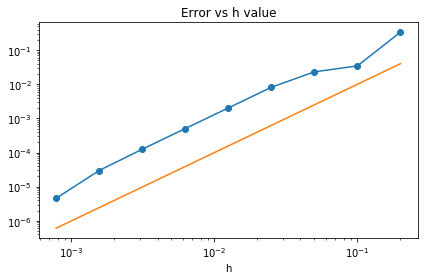

In [81]:
eps = .1
f= np.array([[0,0],[0,0]])
alpha = 1
beta =3
#j = np.array([1,2,3,4,5,6,7,8,9])
error = []
hs = []
#get the h squareds 
for j in range(0,9):
    a=  5*2**j+1
    blankspace = np.linspace(0,1,a)
    hs.append((blankspace[1]-blankspace[0])**2)
#create the domain overwhich we will plot (the 1/(5*2**n) h values)
ral = [1/5,1/10,1/(5*2**2),1/(5*2**3),1/(5*2**4),1/(5*2**5),1/(5*2**6),1/(5*2**7),1/(5*2**8)]

# best approximation
sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))
for j in range(0,9):
    # approximation with 5*(2^j) intervals
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))
    
    #hs.append(y)
    # approximation error
    error.append(np.max(np.abs(sol_approx - sol_best[::2**(9-j)])))
#graph the scuffed errors that i got
plt.loglog(ral,error,'o-')
plt.loglog(ral,hs)
plt.xlabel("h")
plt.title("Error vs h value")
plt.tight_layout()
plt.show()


# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y'' +a_2(x)y'+ a_3(x) y = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\epsilon y'' - 4(\pi - x^2)y = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\epsilon = 0.1$ on a grid with $n=30$ subintervals.

In [82]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
       using finite differences."""
    #create the domain over which we do the calculations
    domain = np.linspace(a,b,n+1)
    #solve for all the function values before hand to use in the construction of the matrix
    a1x = np.array([a1(x) for x in domain[1:n]])
    a2x = np.array([a2(x) for x in domain[1:n]])
    a3x = np.array([a3(x) for x in domain[1:n]])
    #find step size
    h = domain[1]-domain[0]
    #create the diagonals using the finite difference solutions
    d1 = np.diag(-2*a1x/h**2+a3x,0)
    d2 = np.diag(a1x[:-1]/h**2+a2x[:-1]/(2*h),1)
    d3 = np.diag(a1x[1:]/h**2-a2x[1:]/(2*h),-1)
    #make the matrix by adding the off diagonal matrices
    d = (d1+d2+d3)
    #create the array ef which is all the solutions we will solve for
    ef = np.array([f(x) for x in domain[1:n]])
    #create the boundary cases specially
    ef[0] -= alpha*(a1x[0]/(h**2)-a2x[0]/(h*2))
    ef[-1] -= beta*(a1x[-1]/(h**2)-a2x[-1]/(h*2))
    soln = la.solve(d,ef)
    #slap on the alpha and beta endpoint values
    new = np.hstack(([alpha],soln,[beta]))
    return new

In [83]:
#set up the values to use to solve th PDE
a = 0
b = np.pi/2
alpha = 0
beta = 1
a1 = lambda x: .1
a2 = lambda x: 0
a3 = lambda x: -4*(np.pi-x**2)
f = lambda x: np.cos(x)
#use bvp to get the solution using the given parameters then graph it
solved = bvp(a,b,alpha,beta,a1,a2,a3,f,30)
plt.plot(np.linspace(a,b,31),solved)
plt.title("Solution to $\epsilon$y$''$-4($\pi$-x$^2$)y=cos(x)")
plt.show()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\epsilon y'' + xy' = -\epsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\epsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals.

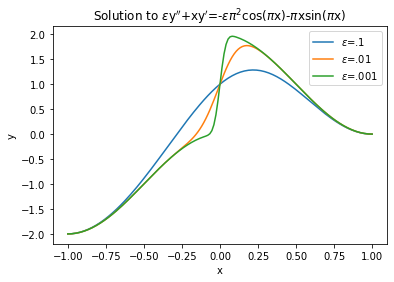

In [84]:
#set up the values for the equations
a = -1
b = 1
alpha = -2
beta = 0
a1 = lambda x: .1
a2 = lambda x: x
a3 = lambda x: 0
f = lambda x: -.1*(np.pi**2)*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)

solved = bvp(a,b,alpha,beta,a1,a2,a3,f,150)
plt.plot(np.linspace(a,b,151),solved,label="$\epsilon$=.1")
#solve again with epsilon =.01
f = lambda x: -0.01*np.pi**2*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)
a1 = lambda x: 0.01
solved2 = bvp(a,b,alpha,beta,a1,a2,a3,f,150)
plt.plot(np.linspace(a,b,151),solved2,label="$\epsilon$=.01")
#solve and plot again with epsilon=.001
f = lambda x: -0.001*np.pi**2*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)
a1 = lambda x: 0.001
solved3 = bvp(a,b,alpha,beta,a1,a2,a3,f,150)
plt.plot(np.linspace(a,b,151),solved3,label="$\epsilon$=.001")

plt.title("Solution to $\epsilon$y$''$+xy$'$=-$\epsilon$$\pi^2$$\cos$($\pi$x)-$\pi$x$\sin$($\pi$x)")
plt.xlabel('x')
plt.legend()
plt.ylabel('y')
plt.show()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\epsilon +x^2)y'' + 4xy' + 2y = 0, \\
	y(-1) = 1/(1+\epsilon), \quad y(1) = 1/(1+\epsilon),
\end{align*}

for $\epsilon = 0.05, 0.02$. Use a grid with $n=150$ subintervals.

In [85]:
#set up the equations to use
a = -1
b = 1
alpha = 1/(1+.05)
beta = 1/(1+.05)
a1 = lambda x: .05+x**2
a2 = lambda x: 4*x
a3 = lambda x: 2
f = lambda x: 0
#find the solution using epsilon = .05
solved = bvp(a,b,alpha,beta,a1,a2,a3,f,150)
plt.plot(np.linspace(a,b,151),solved,label="$\epsilon$=.05")
#find the solution again using epsilon = .02
alpha = 1/(1+.02)
beta = 1/(1+.02)
a1 = lambda x: .02+x**2
solved = bvp(a,b,alpha,beta,a1,a2,a3,f,150)
plt.plot(np.linspace(a,b,151),solved,label="$\epsilon$=.05")
plt.xlabel('x')
plt.ylabel('y')
plt.title("$\epsilon$ +x$^2$y$''$ + 4xy$'$ + 2y = 0")
plt.show()

In [3]:
print(np.diag([1,2,3,4],-1))

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]
